In [1]:
%load_ext kedro

[10/08/25 21:11:57] INFO     Using                                                                  ]8;id=251713;file:///home/zishan/anaconda3/envs/sentiment_analysis/lib/python3.13/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=480637;file:///home/zishan/anaconda3/envs/sentiment_analysis/lib/python3.13/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/home/zishan/anaconda3/envs/sentiment_analysis/lib/python3.13/site-pa                
                             ckages/kedro/framework/project/rich_logging.yml' as logging                           
                             configuration.                                                                        

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=596063;file:///home/zishan/anaconda3/envs/sentiment_analysis/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=163704;file:///home/zishan/anaconda3/envs/sentiment_analysis/lib/python3.13/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=567150;file:///home/zishan/anaconda3/envs/sentiment_analysis/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=322005;file:///home/zishan/anaconda3/envs/sentiment_analysis/lib/python3.13/site-packages/kedro/ipython/__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=926954;file:///home/zishan/anaconda3/envs/sentiment_analysis/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=738243;file:///home/zishan/anaconda3/envs/sentiment_analysis/lib/python3.13/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             /home/zishan/Documents/projects/imdb-review-sentiment-analysis.                       
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/08/25 21:11:58] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=468211;file:///home/zishan/anaconda3/envs/sentiment_analysis/lib/python3.13/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=387744;file:///home/zishan/anaconda3/envs/sentiment_analysis/lib/python3.13/site-packages/kedro_telemetry/plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/08/25 21:11:59] INFO     Kedro project imdb_review_sentiment_analysis                           ]8;id=751363;file:///home/zishan/anaconda3/envs/sentiment_analysis/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=111929;file:///home/zishan/anaconda3/envs/sentiment_analysis/lib/python3.13/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=335836;file:///home/zishan/anaconda3/envs/sentiment_analysis/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=246272;file:///home/zishan/anaconda3/envs/sentiment_analysis/lib/python3.13/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

In [2]:
df = catalog.load('raw_data')
df.info()

                    INFO     Loading data from raw_data (CSVDataset)...                        ]8;id=405966;file:///home/zishan/anaconda3/envs/sentiment_analysis/lib/python3.13/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=191453;file:///home/zishan/anaconda3/envs/sentiment_analysis/lib/python3.13/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  int64 
 1   rating     25000 non-null  int64 
 2   review     25000 non-null  object
 3   sentiment  25000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.4+ KB


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import sent_tokenize,word_tokenize,WordNetLemmatizer

<Axes: xlabel='rating', ylabel='Count'>

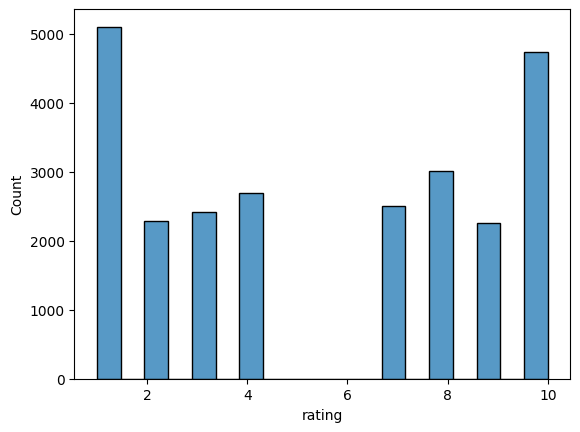

In [4]:
sns.histplot(df['rating'])

In [5]:
df['review'].str.len().min()

np.int64(52)

In [6]:
def clean_text(x: pd.Series) -> pd.Series:
    return (
        x.str.lower()
         .str.replace(r'<.*?>', ' ', regex=True)
         .str.replace(r'http\S+|www\S+', ' ', regex=True)
         .str.replace(r'[^a-z\s]', ' ', regex=True)
         .str.replace(r'\s+', ' ', regex=True)
         .str.strip()
    )

In [7]:
df['sentences'] = df['review'].apply(sent_tokenize)

In [13]:
nltk.download('wordnet')
lemmitizer = WordNetLemmatizer()
df['lemmas'] = df['review'].apply(lemmitizer.lemmatize)

[nltk_data] Downloading package wordnet to /home/zishan/nltk_data...


In [14]:
df['review'] = clean_text(df['review'])

In [15]:
df['words'] = df['review'].apply(word_tokenize)